#Deep Abstract: Quick comprehension tool

With the advancement of technology, a large amount of textual information is available online to the users. This project aims to develop a text summarization tool to help people understand long articles easily. We are using NLP Techniques and deep learning models to create a user-friendly text summarization tool. The project involves the collection of relevant data, experimenting with different models, and deploying an easy-to-use API using Flask. We will use real -world data collected from different Canadian news sources and explore techniques to improve model performance such as advanced text wrangling.


## Team E

* Raemil Corniel (C0922799)
* Sonal Parmar(C0924740)
* Yasaswin Palukuri(C0928450)
* Aparna Suresh(C0928056)
* Rahul Mehta(C0910406)


### 0. Install libraries needed to run the notebook

In [24]:
pip install transformers


In [25]:
pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [26]:
pip install nltk

In [5]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
     

In [40]:
pip install rouge_score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=a47349fc7fe5225fffcde5d4bea7f2345f2afe2fb771bc7f87b4a1e2c3897a5e
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


### 1. Load Libraries

In [7]:
import requests
import pandas as pd
import re
from bs4 import BeautifulSoup
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
from collections import Counter
from sklearn.model_selection import train_test_split
from transformers import BartForConditionalGeneration, BartTokenizer
import tensorflow as tf

import torch
from torch.utils.data import Dataset, DataLoader


from transformers import DataCollatorForSeq2Seq
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments         # These will help us to fine-tune our model
from transformers import pipeline
from transformers import LEDForConditionalGeneration, LEDTokenizer






In [6]:
from datasets import load_metric

In [17]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# Configure pandas to display all text without truncation
pd.set_option('display.max_colwidth', None)


### 2. Summarizer from pre-trained
this will be used to generate a basic summary of the text collected for later use in our validation process  


In [ ]:
#load summarizer

# Load the summarization pipeline
summarizer = pipeline("summarization")
tokenizer = LEDTokenizer.from_pretrained('allenai/led-base-16384')
model = LEDForConditionalGeneration.from_pretrained('allenai/led-base-16384')


### 3. Classes and Function
#### This is to avoid code repetition and for code clarity and reusability  

In [ ]:
def getTextFromURL(url,newsChannel):
  # Fetch the webpage content
  response = requests.get(url)
  #get response
  html = response.content
  return html


# Remove html tags using beautiful soup
def removeHTMLTags(html):
  soup = BeautifulSoup(html, 'html.parser')

  # Decompose the style and script tags
  for data in soup(['style', 'script']):
      data.decompose()

  # Return only the text
  return ' '.join(soup.stripped_strings)

def removeNotNeedeText(text, start, stop):

  #remove text before start
  index = text.find(start)

  if index != -1:
    text = text[index + len(start):]

  #remove text after stop
  index = text.find(stop)

  if index != -1:
    text = text[0:index]

  return text

def removeURL(text):
  # Define a regex pattern for matching URLs
  url_pattern = r'(https?:\/\/(?:www\.)?|www\.)[a-zA-Z0-9-._~:/?#\[\]@!$&\'()*+,;=]+'

  # Use re.sub to replace URLs with an empty string
  cleaned_text = re.sub(url_pattern, '', text)

  return cleaned_text


def getSummarization(text,  max_length_token=16384):

  #calculate the amount of min words and max word the summary should have base on
  # the len of the text, always a 25% of the total len text

  total_words = len(text.split())
  target_summary_length = int(total_words * 0.25)

  # Set min_length and max_length for the summary
  min_length = max(1, target_summary_length - 5)  # Ensure min_length is at least 1
  max_length = target_summary_length + 5

  summary=''
  typePreTrainned = ''

  if(total_words<750):
    #use summarizer from hugging face
    result  = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
    summary = result[0]['summary_text']
    typePreTrainned='summarizer'
  else:
    # Tokenize the text and create input tensors
    inputs = tokenizer(text, return_tensors="pt", max_length=max_length_token, truncation=True)

    # Generate summary
    summary_ids = model.generate(
        inputs['input_ids'],
        max_length=target_summary_length,
        min_length=min_length,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True # Ensure early stopping to avoid generating too much text
        )

    # Decode the generated summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    typePreTrainned='allenai'



  return summary, min_length, max_length, typePreTrainned, total_words



def createDFFromURL(url,newsChannel,docType):
  #get txt from html
  html = getTextFromURL(url,newsChannel)

  #remove html tags
  noHTMLText = removeHTMLTags(html)

  #remove urls
  noHTMLText = removeURL(noHTMLText)

  if newsChannel == 'cp24':
    #reduce text base on news source, for cp24 the news end when the word Related Stories appear
    noHTMLText = removeNotNeedeText(noHTMLText, 'Last Updated' , 'Related Stories')
    noHTMLText = removeNotNeedeText(noHTMLText, 'Published' , 'Share:')
    noHTMLText = removeNotNeedeText(noHTMLText, 'EDT' , 'Share:')
    noHTMLText = removeNotNeedeText(noHTMLText, 'EDT' , 'Related Stories')

  if newsChannel == 'citynews':
    #reduce text base on news source, for citynews the news end when the word Related Stories appear
    noHTMLText = removeNotNeedeText(noHTMLText, 'Last Updated' , 'Submit a Correction')
    noHTMLText = removeNotNeedeText(noHTMLText, 'Posted' , 'Submit a Correction')
    # Define the regex pattern to match date and time
    date_time_pattern = r'\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?|\d{1,2})(?:\s+\d{1,2},\s+\d{4}(?:\s+\d{1,2}:\d{2}\s*(?:am|pm))?)?\b'

    # Replace the matched pattern with an empty string
    noHTMLText = re.sub(date_time_pattern, '', noHTMLText)


  summary, min_length, max_length, typePreTrainned, total_words = getSummarization(noHTMLText)

  data = {
      'text' : [noHTMLText],
      'text_length': [len(noHTMLText)],
      'total_word': [total_words],
      'summary': [summary],
      'min_word': [min_length],
      'max_word': [max_length],
      'source': [newsChannel],
      'url' : [url],
      'type': [docType],
      'model_used': [typePreTrainned]
  }

  #create df
  df = pd.DataFrame(data)


  return df


### 4. Scrapping the data

In [ ]:


def getFullCSV(urlList, newsChannel, docType):
  #create a global df to save all the scrapped news
  globaldf = pd.DataFrame()

  for url in urlList:
    #get df
    dfwithText = createDFFromURL(url,newsChannel,docType)

    #merge with previous reading
    globaldf = pd.concat([globaldf, dfwithText], ignore_index=True)


  return globaldf


In [ ]:
# #generate a list of urls

cp24NewsList  = [
    "https://www.cp24.com/news/two-listeriosis-deaths-in-ontario-linked-to-plant-based-milk-recall-moh-1.6968389",
    "https://www.cp24.com/news/flooding-raises-questions-about-toronto-s-vulnerability-to-large-storms-1.6967680",
    "https://www.cp24.com/news/i-actually-rented-a-bike-race-car-driver-almost-misses-honda-indy-press-conference-due-to-toronto-gridlock-1.6969007",
    "https://www.cp24.com/news/grocery-stores-can-sell-ready-to-drink-beverages-as-of-today-as-lcbo-strike-continues-1.6968652",
    "https://www.cp24.com/news/2-vaughan-residents-charged-after-unapproved-prescription-drugs-seized-1.6968686",
    "https://www.cp24.com/news/it-was-like-a-movie-some-toronto-homeowners-facing-flooded-basements-in-wake-of-record-breaking-storm-1.6968798",
    "https://www.cp24.com/news/police-investigation-reports-of-falling-objects-damaging-vehicles-near-the-don-valley-parkway-1.6969051",
    "https://www.cp24.com/news/our-loading-bays-are-flooded-our-freezer-is-broken-north-york-food-bank-appeals-for-help-1.6968547",
    "https://www.cp24.com/news/new-condo-sales-plummeted-to-lowest-level-since-1997-in-first-half-of-year-report-1.6968728",
    "https://www.cp24.com/news/toronto-rapper-s-firearms-charges-dropped-after-police-breached-his-rights-tailored-court-testimonies-judge-1.6968281",
    "https://www.cp24.com/news/police-dismantle-alleged-chop-shop-in-milton-recover-12-stolen-vehicles-1.6968585",
    "https://www.ctvnews.ca/politics/high-profile-liberal-minister-quitting-cabinet-not-running-in-next-election-1.6968645"
    "https://www.cp24.com/news/just-fly-a-drone-over-suggestion-on-encampment-response-at-u-of-t-council-meeting-sparks-privacy-concerns-for-protesters-advocates-1.6968288",
    "https://www.cp24.com/news/more-than-100-residents-rescued-from-mississauga-ont-nursing-home-amid-flooding-1.6968243",
    "https://www.cp24.com/news/ford-to-produce-f-series-pickups-at-oakville-plant-starting-in-2026-1.6968546",
    "https://www.cp24.com/news/partially-treated-wastewater-enough-to-fill-500-olympic-sized-pools-dumped-into-lake-ontario-during-heavy-rainfall-city-1.6967604",
    "https://www.cp24.com/news/former-safety-minister-wants-protective-zones-for-mps-offices-as-threats-increase-1.6968248",
    "https://www.cp24.com/news/flooding-raises-questions-about-toronto-s-vulnerability-to-large-storms-1.6967680",
    "https://www.cp24.com/news/domestic-violence-strategy-should-include-more-prevention-programs-experts-1.6968245",
    "https://www.cp24.com/news/lt-gen-jennie-carignan-to-officially-take-over-command-of-armed-forces-in-ceremony-1.6968251",
    "https://www.cp24.com/news/republican-national-convention-focuses-on-foreign-policy-1.6968265",
    "https://www.cp24.com/news/charges-laid-in-investigation-into-group-allegedly-distributing-narcotics-in-hamilton-niagara-region-1.6968030"
    "https://www.cp24.com/news/police-investigation-reports-of-falling-objects-damaging-vehicles-near-the-don-valley-parkway-1.6969051",
    "https://www.cp24.com/news/heartbreaking-bike-used-for-cancer-fundraising-stolen-from-toronto-woman-s-basement-1.6975085",
    "https://www.cp24.com/news/new-zealand-man-says-canadian-regulators-e-commerce-platforms-should-have-protected-his-late-brother-1.6975329",
    "https://www.cp24.com/news/man-charged-after-allegedly-stealing-more-than-60k-in-clothing-from-downtown-toronto-retailers-1.6974823",
    "https://www.cp24.com/news/police-id-81-year-old-woman-killed-in-north-york-stabbing-1.6975072",
    "https://www.cp24.com/news/why-toronto-is-a-special-place-for-deadpool-wolverine-star-hugh-jackman-1.6975190",
    "https://www.cp24.com/news/pedestrian-critically-injured-after-being-struck-by-vehicle-on-gardiner-expressway-1.6975052",
    "https://www.cp24.com/news/suspect-caught-on-surveillance-camera-committing-indecent-act-toronto-police-1.6975316",
    "https://www.cp24.com/news/siu-called-in-after-man-shot-by-toronto-police-officer-in-cabbagetown-1.6975118",
    "https://www.cp24.com/world/harris-tells-roaring-wisconsin-crowd-november-election-is-a-choice-between-freedom-and-chaos-1.6974566",
    "https://www.cp24.com/news/sentencing-hearing-set-to-begin-in-nygard-sexual-assault-case-1.6975396",
    "https://www.cp24.com/the-old-farmers-almanac-just-released-ontario-s-fall-forecast-here-s-what-to-expect-1.6975158",
    "https://www.cp24.com/news/wildfire-evacuees-ordered-to-leave-jasper-find-relief-after-long-journey-to-safety-1.6975404",
    "https://toronto.ctvnews.ca/issued-a-traffic-ticket-the-city-of-toronto-urges-caution-over-third-party-payment-companies-1.6975123",
    "https://www.cp24.com/news/two-vehicle-crash-in-hamilton-leaves-1-dead-3-injured-police-1.6975454",
    "https://www.cp24.com/news/canadian-olympic-soccer-coach-priestman-to-miss-opener-two-staffers-sent-home-after-drone-incidents-1.6975468",
    "https://www.cp24.com/news/plane-crashes-just-after-takeoff-from-nepal-s-capital-killing-18-people-pilot-is-lone-survivor-1.6975733",
    "https://www.cp24.com/news/privacy-commissioner-probing-customers-claims-they-can-t-delete-pc-optimum-accounts-1.6975701",
    "https://www.cp24.com/news/toronto-man-who-allegedly-hid-dead-body-in-east-end-apartment-wanted-on-additional-charges-1.6975545",
    "https://www.cp24.com/news/latest-phase-of-gardiner-expressway-construction-being-moved-up-by-a-year-1.6975490",
    "https://www.cp24.com/news/2-dead-2-injured-after-gun-battle-outside-scarborough-plaza-police-1.6975391",

    ]


citynewsNewsList  = [
    "https://toronto.citynews.ca/2024/07/24/peter-nygard-canada-sexual-assault-case/",
    "https://toronto.citynews.ca/2024/07/24/in-the-news-today-wildfire-evacuees-relieved-after-evacuating-jasper/",
    "https://toronto.citynews.ca/2024/07/24/wildfire-evacuees-ordered-to-leave-jasper-find-relief-after-long-journey-to-safety/",
    "https://toronto.citynews.ca/2024/07/24/b-c-wildfire-tally-surges-as-firefighters-take-to-air-to-battle-blazes/",
    "https://toronto.citynews.ca/2024/07/24/bank-of-canada-expected-to-deliver-second-consecutive-rate-cut-today/",
    "https://toronto.citynews.ca/2024/07/23/canada-soccer-staff-member-accused-of-spying-on-opponent-at-olympics/",
    "https://toronto.citynews.ca/2024/07/23/manitoba-chiefs-decry-reduced-federal-funds-for-residential-school-searches/",
    "https://toronto.citynews.ca/2024/07/23/quebec-government-funnels-another-413-million-to-airbus-a220-program/",
    "https://toronto.citynews.ca/2024/07/23/one-of-canadas-new-navy-ships-stopped-in-hawaii-after-taking-on-water/",
    "https://toronto.citynews.ca/2024/07/23/yukon-mine-inspector-directs-victoria-gold-to-shore-up-water-treatment-efforts/",
    "https://toronto.citynews.ca/2024/07/23/feds-were-warned-about-setting-significant-precedent-with-ukraine-visa-program/",
    "https://toronto.citynews.ca/2024/07/23/advocate-warns-of-impending-crisis-in-b-c-child-welfare-staffing/",
    "https://toronto.citynews.ca/2024/07/23/three-people-from-laval-que-killed-in-small-plane-crash-in-northeastern-ohio/",
    "https://toronto.citynews.ca/2024/07/23/trudeau-hand-picking-candidate-in-montreal-byelection-riles-aspiring-contenders/",
    "https://toronto.citynews.ca/2024/07/23/canadians-to-watch-paris-olympics-2024-summer/",
    "https://toronto.citynews.ca/2024/07/23/canadians-against-re-election-donald-trump-us-poll/",
    "https://toronto.citynews.ca/2024/07/23/in-the-news-today-storms-on-the-way-as-b-c-wildfires-ramp-up/",
    "https://toronto.citynews.ca/2024/07/23/high-winds-large-hailstones-and-high-temperatures-challenge-b-c-wildfire-crews/",
    "https://toronto.citynews.ca/2024/07/23/alberta-wildfires-jasper-national-park/",
    "https://toronto.citynews.ca/2024/07/22/fuel-spill-sparks-evacuation-worries-for-nunavut-community/",
    "https://toronto.citynews.ca/2024/07/22/man-accused-of-killing-fellow-student-in-class-wanted-tarot-cards-back-court-hears/",
    "https://toronto.citynews.ca/2024/07/22/two-albertans-charged-in-online-death-threats-to-trudeau-other-federal-leaders/",
    "https://toronto.citynews.ca/2024/07/22/gaza-protesters-at-university-of-victoria-clearing-encampment-after-trespass-notice/",
    "https://toronto.citynews.ca/2024/07/22/senior-quebec-church-leader-resumes-role-after-six-month-leave-due-to-abuse-claims/",
    "https://toronto.citynews.ca/2024/07/22/us-drops-planned-regulations-dogs-crossing-border-canada/",
    "https://toronto.citynews.ca/2024/07/22/kamala-harris-canada-u-s-relationship-biden/",
    "https://toronto.citynews.ca/2024/07/22/stall-and-crash-in-plane-in-b-c-renews-safety-board-call-to-transport-canada/",
    "https://toronto.citynews.ca/2024/07/22/canadian-living-abroad-struggling-to-access-funds-bank/",
    "https://toronto.citynews.ca/2024/07/22/residents-back-home-after-evacuations-in-williams-lake-b-c/",
    "https://toronto.citynews.ca/2024/07/22/ticks-lyme-anaplasmosis-diseases/",
    "https://toronto.citynews.ca/2024/07/22/canadian-killed-near-gaza-border-after-threatening-forces-with-knife-israeli-police/",
    "https://toronto.citynews.ca/2024/07/22/in-the-news-today-interest-rate-cut-possible-this-week-economists/",
    "https://toronto.citynews.ca/2024/07/22/mom-wants-quicker-reform-on-disaster-preparations-one-year-after-flood-took-son/",
    "https://toronto.citynews.ca/2024/07/21/baby-gourmet-foods-recall-organic-baby-cereal/",
    "https://toronto.citynews.ca/2024/07/21/what-to-know-about-the-canadian-ties-of-kamala-harris-bidens-choice-for-successor/",
    "https://toronto.citynews.ca/2024/07/21/more-evacuation-orders-in-b-c-as-heat-wave-aids-lightning-triggered-wildfires/",
    "https://toronto.citynews.ca/2024/07/21/second-b-c-university-issues-trespass-notice-to-pro-palestinian-protesters/",
    "https://toronto.citynews.ca/2024/07/21/in-newfoundland-a-town-rejoices-after-seven-fishers-feared-lost-return-home-safe/",
    "https://toronto.citynews.ca/2024/07/20/trudeau-and-family-head-to-british-columbia-for-vacation-in-unnamed-location/",
    "https://toronto.citynews.ca/2024/07/20/police-seize-over-30-stolen-vehicles-thousands-of-dollars-in-montreal-area/",
    "https://toronto.citynews.ca/2024/07/20/canada-microsoft-windows-crowdstrike-update/",
    "https://toronto.citynews.ca/2024/07/20/wildfires-erupt-in-b-c-with-more-heat-and-thunderstorms-on-the-way/",
    "https://toronto.citynews.ca/2024/07/20/how-b-c-s-firefighting-smokejumpers-take-ultra-extreme-and-make-it-seem-mundane/",
    "https://toronto.citynews.ca/2024/07/20/canada-gun-control-assault-style-weapons-polysesouvient/",
    "https://toronto.citynews.ca/2024/07/20/in-montreal-services-for-the-vulnerable-trigger-backlash-but-no-easy-solutions/",
    "https://toronto.citynews.ca/2024/07/19/ottawa-says-it-has-taken-note-of-un-court-call-for-end-to-israeli-settlements/",
    "https://toronto.citynews.ca/2024/07/19/government-to-provide-1-2-million-to-establish-office-of-grocery-code-of-conduct/",
    "https://toronto.citynews.ca/2024/07/19/wecook-brand-swiss-cheese-meatballs-recalled-due-to-listeria-concerns/",
    "https://toronto.citynews.ca/2024/07/19/city-councilor-laura-palestini-to-run-for-liberals-in-montreal-byelection/",
    "https://toronto.citynews.ca/2024/07/19/proposed-class-action-lawsuit-filed-over-calgary-water-main-break/",
    "https://toronto.citynews.ca/2024/07/19/five-things-to-know-about-quebecs-unique-two-week-long-construction-holiday/",
    "https://toronto.citynews.ca/2024/07/19/toronto-flood-insurance-claims-could-be-significant-but-manageable-ratings-agency/",
    "https://toronto.citynews.ca/2024/07/19/more-than-250-wildfires-in-b-c-as-hot-and-dry-weather-persists/",
    "https://toronto.citynews.ca/2024/07/19/two-men-shot-dead-in-montreal-the-citys-19th-and-20th-homicides-in-2024/",
    "https://toronto.citynews.ca/2024/07/19/top-court-says-government-can-be-held-liable-for-making-unconstitutional-laws/",
    "https://toronto.citynews.ca/2024/07/19/canada-child-benefit-reindexing/",
    "https://toronto.citynews.ca/2024/07/19/canadian-flights-hospitals-border-disrupted-during-global-technology-outage/",
    "https://toronto.citynews.ca/2024/07/19/crypto-currency-artificial-intelligence-robotics-canada-the-big-story-podcast/"


]





In [ ]:

#add all my url news to one final df
citynewsDf = getFullCSV(citynewsNewsList,'citynews','news')



#show dimenssions
print(f'shape {citynewsDf.shape}')




https://toronto.citynews.ca/2024/07/24/peter-nygard-canada-sexual-assault-case/
 . A sentencing hearing is underway in Toronto for former fashion mogul Peter Nygard, who was found guilty of four counts of sexual assault last fall. The sentencing process has been delayed in part because Nygard’s two previous defence lawyers, Brian Greenspan and Megan Savard, asked to withdraw from the case earlier this year. Nygard, who once led a multimillion-dollar clothing empire, has also faced health challenges throughout the case, and his health is expected to be raised during sentencing submissions. He was found guilty on four counts of sexual assault on .  but was acquitted of a fifth count, as well as a charge of forcible confinement. The charges relate to allegations dating from the 1980s until the mid-2000s. Related: Case against Peter Nygard is a ‘false narrative,’ defence argues in closing remarks Peter Nygard found guilty on four counts of sexual assault, acquitted on two others Nygard is 

Input ids are automatically padded from 996 to 1024 to be a multiple of `config.attention_window`: 1024


 . Here is a roundup of stories from The Canadian Press designed to bring you up to speed… Wildfire evacuees relieved after evacuating Jasper Some wildfire evacuees who were trapped in traffic for hours while leaving Jasper National Park say they are feeling relieved they’ve found safety. Addison McNeill, who is , says she immediately felt stressed when she got an alert on Monday night to evacuate the alpine town about two hours after she moved there from Edmonton. When she got on the road, she says she saw Jasper’s ,700 residents and other tourists exiting the town calmy despite being trapped in a gridlock and hot, smoky air for hours Evacuees were initially ordered to go to British Columbia but were directed on Tuesday to make a wide U-turn as that province was dealing with its own wildfires. Since then, reception centres have been set up in Grande Prairie, located north of Jasper, and Calgary to the south where evacuees are being helped with accommodation. Here’s what else we’re wat

Input ids are automatically padded from 1057 to 2048 to be a multiple of `config.attention_window`: 1024


 . OTTAWA — Federal immigration officials warned the government it risked undermining the temporary immigration system with the design of the emergency visa program for war-displaced Ukrainians, newly released court documents show. Immigration Department staff raised the concern in a memo to Sean Fraser, immigration minister at the time, shortly after the program was announced. The memos outline the design of the Ukraine visa program, which allowed an unlimited number of Ukrainians and their family members to come to Canada to wait out the war. The policy also waived the requirement for fleeing Ukrainians to promise to leave when their visa expires, against the advice of department staff. “Waiving the need for a client to establish temporary intent would set a significant precedent that is not recommended, given that it would undermine a foundational component of the (temporary resident) legal framework,” staff said in the memo to Fraser, which was signed . Staff cautioned that waiving

Input ids are automatically padded from 1130 to 2048 to be a multiple of `config.attention_window`: 1024


 . British Columbia’s child welfare system is either in a state of crisis or close to it with understaffing and unmanageable workloads, the province’s representative for children said. A report released by Jennifer Charlesworth Tuesday said the environment for social workers at the Ministry of Children and Family Development is unhealthy for staff, characterized by undue stress, burnout and fear, and there’s no time for the government to wait to address the “critical circumstances.” The latest investigation comes days after her report on the torture death of an -year-old boy who died at the hands of relatives after not being checked on by a social worker for seven months. Charlesworth said the boy’s death happened within the context of a child welfare office that was not fully staffed, had unstable and changing local leadership, and had an extended period of social worker medical leave with no backfill. Her office conducted a survey of 700 social workers and managers and more than  per

Input ids are automatically padded from 2180 to 3072 to be a multiple of `config.attention_window`: 1024


 . While Canada may be challenged to match its -medal haul from Tokyo at the Paris Olympics, the country does boast a potential star of the Games. Swimming sensation Summer McIntosh, , has only gotten better — much better — since finishing fourth as a -year-old in the women’s 400-metre freestyle at the 2021 Games. The Toronto native will swim in four individual events, and as many as three relays — and expectations are high. “Summer McIntosh is the single best overall swimmer in the world today. There really isn’t anybody better,” NBC swimming analyst Rowdy Gaines told his network recently. “A lot of people will know that name by the end of summer.” McIntosh holds the world record in the 400-m individual medley and is very capable of hitting the podium in the 200-m. IM, 200-m. butterfly, and 400-m. freestyle. Gaines compared McIntosh to two of the all-time American greats in an interview with CBC . “You have your Michael Phelps. You have your Summer,” he said of McIntosh, who named one

Input ids are automatically padded from 1027 to 2048 to be a multiple of `config.attention_window`: 1024


 . Here is a roundup of stories from The Canadian Press designed to bring you up to speed… Evacuation ordered for Jasper Park and townsite Multiple wildfires in Jasper National Park flared up with a vengeance late Monday night, forcing all park visitors along with the ,700 residents of the Jasper townsite to flee west with little notice over mountain roads through darkness, soot and ash. Photos and video shared on social media illuminate a midnight cavalcade of bumper-to-bumper cars and trucks, headlights on, red tail lights glowing, cars inching, stopping, starting, crawling through swirling tendrils of acrid smoke. The Jasper townsite — and the park’s main east-west artery Highway  — were caught in a fiery pincer. Fires threatening from the northeast cut off highway access east to Edmonton. Another fire roaring up from the south forced the closure of the north-south Icefields Parkway. That left one route open — west to B.C. Park and town officials scrambled to clear up traffic gridlo

Input ids are automatically padded from 1486 to 2048 to be a multiple of `config.attention_window`: 1024


 . BARKERVILLE, BRITISH COLUMBIA, CANADA — The British Columbia gold rush town of Barkerville is drenched, both from overnight rains and sprinklers dousing its timber buildings, some more than 150 years old. It’s part of an effort to save the historic park that is one of the Cariboo region’s premier tourist attractions from the flames of the Antler Creek wildfire that is burning out of control about three kilometres away, said Stewart Cawood, Barkerville’s public programming and media manager. “Today is looking better with the rain that we had overnight, but with it being so close and fires being so unpredictable, even with all these protective measures in place, there’s absolutely a concern we could lose the town,” he said. The storms that have drenched the region are a mixed blessing, soaking the town but also bringing lightning that the BC Wildfire Service fears could cause another burst of wildfire activity in the north and parts of the south after weeks of hot and dry weather. Lig

Input ids are automatically padded from 1216 to 2048 to be a multiple of `config.attention_window`: 1024


 . Thousands of wildfire evacuees forced from Jasper National Park into British Columbia along smoke-choked mountain roads Monday night were directed Tuesday to make a wide U-turn and head home if they needed a place to stay. Alberta fire officials said B.C. has its hands full with its own wildfires and evacuations . “The issue is the severity of wildfire activity and evacuations in B.C. proper,” Stephen Lacroix, managing director of the Alberta Emergency Management Agency, told reporters during a video conference. “They had no capacity to house Albertans.” Alberta Public Safety Minister Mike Ellis said reception centres were being set up in Grande Prairie to the north and Calgary to the south. Ellis told evacuees to take massive detours, either through Prince George, B.C., proceeding north and east to Grande Prairie, or south to Kamloops before going east to Calgary. “One fire is approximately  kilometres south of Jasper on both sides of the (Athabasca) River and wind may exacerbate t

Input ids are automatically padded from 1139 to 2048 to be a multiple of `config.attention_window`: 1024


 . Observers expect Kamala Harris to follow President Joe Biden’s roadmap for America’s relationship with Canada as she moves to secure the Democratic party’s presidential nomination. “On the key things that matter for Canada-U.S. relations, her outlook is very similar to the president,” said Christopher Sands, director of the Canada Institute at the Woodrow Wilson Center in Washington. Biden endorsed Harris, his second-in-command, as he dropped out of the 2024 presidential race Sunday. Biden bowed to weeks of pressure after appearing confused and frail during a debate with Republican rival Donald Trump last month, followed by missteps on the world stage during the NATO leaders’ conference. The vice-president moved quickly to shore up support for her bid to be the party’s presidential nominee. Harris has received the blessing of important Democratic figures including former House speaker Nancy Pelosi, who holds significant influence and sway within the party. “The most important thing 

Input ids are automatically padded from 1377 to 2048 to be a multiple of `config.attention_window`: 1024


 . WILLIAMS LAKE, BRITISH COLUMBIA, CANADA — Residents of Williams Lake, B.C., got a front-row look at the wildfire fight to save their community, as water bombers swooped low and dropped red fire retardant, crews sprayed structure fires from ladders and RCMP evacuated homes. “Everybody was panicked, (which was) understandable because the fire was less than a road across from us,” resident Spencer Stratton said, noting well over 100 people had gathered about a block away as the River Valley fire reached the western edge of the central Interior city. “It was one set of buildings away from us — that’s how close the fire was.” Residents who were evacuated were told Monday they could return and the BC Wildfire Service said crews were “mopping up” from the blaze. But Rob Warnock, the director of the Williams Lake emergency operations centre, said in a video posted to the city’s website that those homes remain subject to an evacuation alert, meaning residents must be ready to leave again qui

Input ids are automatically padded from 1432 to 2048 to be a multiple of `config.attention_window`: 1024


 . Here is a roundup of stories from The Canadian Press designed to bring you up to speed… President Joe Biden ends his 2024 re-election bid Prime Minister Justin Trudeau joined a chorus of officials and political compatriots praising Joe Biden’s years of public service on Sunday after the president bowed to weeks of mounting pressure and officially withdrew from his country’s looming election. Biden’s decision to step aside as the Democrat candidate, announced in a letter posted to social media, came after members of his own party spoke out in increasing numbers to voice concerns over the -year-old’s mental acuity and ability to win the faceoff with Republican rival Donald Trump. Trudeau said he’s known Biden for years and called the president a “true friend.” The Democrats’ calls for Biden to drop out of the race began after a disastrous debate performance against Trump and intensified following multiple missteps on the world stage during the recent NATO leaders’ summit in Washington

Input ids are automatically padded from 1231 to 2048 to be a multiple of `config.attention_window`: 1024


 . HALIFAX — The mother of a boy who died a year ago in a Nova Scotia flood says her grief returns daily, along with frustration over what she considers the province’s slow pace in reforming its preparations for climate disasters. Tera Sisco’s six-year-old son Colton Sisco died after the vehicle he was in overturned during torrential thunderstorms on . About 258 millimetres of rain to the municipality of West Hants — a rural area northwest of Halifax — fell during the overnight flash flood. “It’s still a struggle, every day,” said Sisco in a recent telephone interview. As the one-year mark of her son’s death approached, she said her memories of being with him before the flooding are “on replay.” “It’s hard. … there’s part of me that still doesn’t want to believe it happened.” Natalie Harnish, six, died in the same vehicle as Sisco, while -year-old Nick Holland and -year-old Terri-Lynn Keddy were swept away from a vehicle on the same road and also died. The tragedy has drawn repeated ca

Input ids are automatically padded from 1028 to 2048 to be a multiple of `config.attention_window`: 1024


 . Lightning-triggered wildfires over the weekend have prompted a number of evacuation orders and alerts across British Columbia, a situation that has been exacerbated by an ongoing heat wave. The BC Wildfire Service said Sunday that crews are battling more than 300 blazes, with several evacuation orders in effect in both Central and East Kootenay as well as in Thompson-Nicola, Cariboo and Bulkley — Nechako in the northwest. “Fire suppression efforts continue to be challenged due to hot, dry conditions and localized winds,” the wildfire service said in its Sunday update. “A three week heat wave continues, and more hot and dry conditions are expected to continue for most of the province.” Environment Canada said  B.C. communities broke or matched their daily high-temperature records on Saturday, with Lytton reaching a high of . degrees — breaking a record of . degrees set in 1946. Temperature records also fell in the B.C. communities of Cranbrook, Merritt, Princeton, Trail and Vernon, w

Input ids are automatically padded from 1324 to 2048 to be a multiple of `config.attention_window`: 1024


 . NEW-WES-VALLEY, N.L. — There was a powerful word being repeated in the joyful Newfoundland community of New-Wes-Valley on Sunday: “Miracle.” Over and over, residents out walking or chatting to one another in local stores described the rescue of seven fishermen from the area who had somehow survived two days in a life-raft on the Atlantic ocean as nothing short of miraculous. “Thank you, thank you, thank you. Thank you for returning our men,” Betty Lou Pollett told a crowd of hundreds at the end of a community parade held to celebrate the fishers’ return. The Elite Navigator fishing boat and its crew seemed to vanish on Wednesday night after several days at sea fishing for turbot. The craft was reported missing on Thursday after transmitting its final signal at around : p.m. the night before, the Canadian Coast Guard said. The vessel had caught fire, forcing the crew to abandon the ship and wait for rescue on the life-raft. In New-Wes-Valley, which is an amalgamation of three small f

Input ids are automatically padded from 1203 to 2048 to be a multiple of `config.attention_window`: 1024


 . The mayor of a British Columbia Interior community says the area’s long-term care residents have been moved out as a fast-moving wildfire looms nearby. Barbara Roden, mayor of Ashcroft, B.C., located about 360 kilometres northeast of Vancouver, said Saturday that community remains under an alert to be ready to evacuate on short notice. Roden said the anxiety among residents is “settling down a little bit” as the nearby Shetland Creek wildfire appeared to push northward Saturday. “In the early stages of a fire, there is of course a lot of stress, a lot of fear, a lot of nervousness,” she said. “(But) we’ve seen that the fire has largely stayed in a northerly course, not veering off to the east towards Ashcroft or Cache Creek, the more populated areas in this region.” Roden said crews have also helped the community’s psyche by keeping nearby Highway  open despite the Shetland Creek blaze growing to about 150 square kilometres in size. “The highway has remained open throughout, which i

Input ids are automatically padded from 1583 to 2048 to be a multiple of `config.attention_window`: 1024


 . VANCOUVER — Standing on the edge of an open aircraft hatch, a smokejumper in a pale yellow suit steadies himself before rocking back then swinging out the door and vanishing as gravity takes over. “Jumper’s away,” someone inside the plane yells as the video pans outside the window, where smoke billows toward the sky from a wildfire below. The footage is from last year at the start of what would soon become the busiest smokejumping season in the -year history of the program. Smokejumpers, also known as parattack crews, are wildland firefighters who are trained to parachute from fixed-wing aircraft, called “jumpships.” The job is thrilling, and like all firefighting comes with an element of danger, said veteran B.C. smokejumper Tom Reinboldt. But with rigorous training, he said, the goal is to “take what seems ultra-extreme and make it seem mundane.” Once on the ground, the firefighters might battle a blaze using water from a natural source, or perform other firefighting tasks like tr

Input ids are automatically padded from 1017 to 1024 to be a multiple of `config.attention_window`: 1024


 . MONTREAL — Officials in Montreal are struggling to get the public on board with the city’s approach to treating people with severe addiction and homelessness, as those social crises become fodder for political attacks. In Montreal’s St-Henri neighbourhood, a supervised consumption site that also provides transitional housing for homeless people with addiction or mental health issues has nearby residents fuming because it’s located near an elementary school. A few kilometres away, in downtown Montreal, another supervised drug use site has helped turn part of the district into what has become known as “crack alley.” The city is feeling the heat from residents, and in response will hold public consultations on how to integrate services for vulnerable people within urban areas. Montreal’s mayor is also getting criticized by federal Conservative Leader Pierre Poilievre, who held a news conference outside St-Henri’s Maison Benoît Labre on  , saying the mayor is forcing children to go to s

Input ids are automatically padded from 1258 to 2048 to be a multiple of `config.attention_window`: 1024


 . It’s the first time The Inn at Spences Bridge has been empty since . Dorothy Boragno, who owns the inn with her husband Michael Findlay, said Friday they watched thick smoke across the Thompson River from the out-of-control Shetland Creek wildfire that has already forced others to evacuate. “We’ve been through fires before, so we know what happens, and if they get close, usually we get firemen to stay at our hotel, so we’re not too worried yet. But it does bring back bad memories,” said Boragno. The Shetland Creek fire in the southern Interior more than doubled in size from Thursday to Friday, due to what the B.C. Wildfire Service said was “significant overnight growth” and more accurate mapping. Its rapid spread was part of an eruption of wildfire activity across B.C., with the number of fires soaring past 300 on Friday afternoon, most caused by recent lightning storms, then fuelled by hot, dry weather and winds. The Shetland Creek fire is now listed at 132 square kilometres in siz

Input ids are automatically padded from 1641 to 2048 to be a multiple of `config.attention_window`: 1024


 . TORONTO — A global technology outage grounded flights, disrupted hospitals, backed up border crossings and even upended coffee orders in Canada on Friday, as issues persisted hours after problems with Microsoft services were said to be on the mend. Cybersecurity firm CrowdStrike said the glitch felt round the world occurred when it deployed a faulty update to computers running Microsoft Windows — and that the outage was not a security incident or cyberattack. The issue affected Microsoft 365 apps and services, and disruptions continued after the tech company said it was gradually fixing the problem. Tens of thousands of devices were knocked out in B.C.’s health sector, temporarily sending hospitals back to the pen-and-paper era. Provincial health authorities in Newfoundland also reported disruptions, as did several major Ontario hospitals. Major Canadian companies, including Porter Airlines and Telus, also said operations had been affected. Brent Arnold, a Toronto-based cybersecurit

In [ ]:
#add all my url news to one final df
cp24Df = getFullCSV(cp24NewsList,'cp24','news')



#show dimenssions
print(f'shape {cp24Df.shape}')


https://www.cp24.com/news/two-listeriosis-deaths-in-ontario-linked-to-plant-based-milk-recall-moh-1.6968389
 Two deaths as a result of a listeriosis outbreak linked to a plant-based milk recall are in Ontario, provincial health officials confirmed Thursday. Silk brand almond milk, coconut milk, almond-coconut milk and oat milk, as well as Great Value brand almond milk, were recalled earlier this month. "At this point in time, the Ministry of Health can confirm that 2 deaths in Ontario have been related to this outbreak," a spokesperson told CP24 in an email. "The Ministry of Health is working closely with Local Public Health Agencies, Public Health Ontario, the CFIA, Health Canada and the Public Health Agency of Canada regarding the recall of these products." At least 12 lab-confirmed cases of listeriosis have been reported in connection with the recall, including 10 in Ontario and one each in Quebec and Nova Scotia. All of the affected products, of which there are 18, include the prod

Input ids are automatically padded from 1009 to 1024 to be a multiple of `config.attention_window`: 1024


 A massive rainstorm which flooded roads, basements and businesses in the city Tuesday is raising questions about Toronto's preparedness when it comes to major weather events. The storm, which dumped a month's worth of rain on the city in a matter of hours, overwhelmed sewer systems and waterways, causing damage and hampering transit. While such storms are rare, they are not unheard of. Another storm about a decade ago in 2013 caused major flooding, submerging vehicles and necessitating the rescue of passengers from a half-submerged GO Train. With more adverse weather expected due to climate change, the city has undertaken flood mitigation work over the past decade, including a massive project to reroute the mouth of the Don River to add flood protection in the Port Lands – a project which marked a major milestone just last week and which is expected to be compete by the end of this year. But the fact that the city has undertaken flood protection work over the past few years left some 

Input ids are automatically padded from 1396 to 2048 to be a multiple of `config.attention_window`: 1024


 A Toronto rapper's firearm charges have been dropped after a judge found police breached his Charter rights and gave “tailored” testimonies while on the stand. In an Ontario Superior Court decision released last month, Justice Sandra Nishikawa handed Omary Bent, 27, a stay of proceedings. He was acquitted of four firearm charges laid on him in the summer of 2021. The acquittal was granted, in part, after Nishikawa found that the officers used excessive force in dragging Bent out of his Etobicoke condominium by his hair and breached his right to counsel in questioning him without a lawyer present. In turn, the judge found the court should “distance itself” from the evidence obtained during the raid. Download our app to get alerts on your device Get the latest local updates right to your inbox According to court documents, the Toronto Police Service (TPS) began looking into Bent after it was suggested by a confidential source that he’d been dealing drugs and possessed a firearm. Police 

Input ids are automatically padded from 1039 to 2048 to be a multiple of `config.attention_window`: 1024


 Ford Motor Co. says it plans to assemble its F-Series Super Duty pickup trucks at its Oakville , Ont., assembly plant beginning in 2026, a move that comes amid delays to the start of planned electric vehicle production at the site. The U.S. automaker said the move would add capacity of up to 100,000 additional units and support 1,800 jobs at the plant to be filled by workers represented by Unifor. Ford announced plans last year to spend $1.8 billion to transform the facility into a hub for electric vehicle manufacturing, including vehicle and battery pack assembly. But after planning to start EV production at the plant in 2025, the company said in April it was pushing that back to 2027 to give the consumer market more time to develop and allow for further development of EV battery technology. Ford said some employees would remain on site during the plant transformation but there would be layoffs, noting it would work with Unifor to mitigate the effect of the delay on its workforce. Br

Input ids are automatically padded from 994 to 1024 to be a multiple of `config.attention_window`: 1024


 Gen. Jennie Carignan was a little emotional on Thursday as she spoke to reporters about what it means to take over command of the Canadian Armed Forces. It's an honour that felt like the natural next step in her career, she said, something she's worked toward for the last 38 years. It also means, for other women or marginalized people, that "it's possible, folks — the door is open." "This is actually what my parents used to tell me: 'Anything is possible. You can do anything,'" she said. "But I realized in 1986 that that was not necessarily true for everybody. Even if the doors were open, perceptions stay. There's unconscious biases that, frankly, I do have to question, myself, regularly." Carignan became chief of the defence staff in a ceremony at the Canadian War Museum in Ottawa on Thursday morning, taking over from Gen. Wayne Eyre, who is set to retire after three years in the job. "I feel ready, poised and supported to take on this manifold challenge," Carignan said at the ceremo

Input ids are automatically padded from 2813 to 3072 to be a multiple of `config.attention_window`: 1024


Page not found | Page not found Search Search CP24 X WATCH LIVE NEWS WEATHER TRAFFIC VIDEO CP24 BREAKFAST Lifestyle CONTESTS MORE Home Local World Entertainment Sports Photo Galleries Commuter Centre Traffic Transit Air Travel Border Crossings CP24 LIVE All Video Ask A Lawyer Hot Property Home All Videos Milestones Wellness Wednesdays Contests Home Human Interest Health Technology Real Estate Travel Top Social Stories CP24 APP Video Help Contact Us CP24 Supports Newsletters Talk Shows Skip to Main Content BREAKING Bank of Canada cuts key interest rate to 4.5% WATCH LIVE CP24 BREAKING NEWS IN TORONTO AND BEYOND Advertisement Page not found Sorry, but the page you are looking for could not be found. Please try checking the URL for errors, then hit the Refresh button. TOP STORY Toronto under severe thunderstorm watch, downpours of 50 mm per hour possible Toronto and much of the surrounding area are under a severe thunderstorm watch Wednesday. 2 dead, 2 injured after 'gun battle' outside S

Input ids are automatically padded from 3784 to 4096 to be a multiple of `config.attention_window`: 1024


Toronto traffic ticket payments: City urges caution over third-party companies | CTV News Skip to main content Live TORONTO Search CTVNews.ca Search News Latest News All News CTV News Investigates Weather Queen's Park Consumer Alert Traffic Toy Mountain Gas Prices Video Latest All Video Consumer Alert Health CTV News Live Video Help Shows News Programs CTV News at Noon CTV News at Six CTV News at 11:30 About Who We Are About Us Contact Us Social Facebook Twitter Instagram Local Other Cities Atlantic Barrie Calgary Edmonton Guelph Kingston Kitchener Lethbridge London Montreal Nanaimo Newfoundland and Labrador Northern Ontario Ottawa Pembroke Prince Albert Red Deer Regina Saskatoon Sault Ste. Marie Toronto Vancouver Vancouver Island Windsor Winnipeg Shopping Trends Sections Black Friday Tech Fashion Beauty Health & Fitness Search CTVNews.ca Search Toronto Issued a traffic ticket? The City of Toronto urges caution over third-party payment companies Share Whether it's for parking, speeding

In [ ]:
#merge dfs
df = pd.concat([cp24Df, citynewsDf], ignore_index=True)

In [ ]:
df.shape

(99, 10)

In [ ]:


#generate csv
#save news collected in a csv
df.to_csv('newsData.csv')

### 5. Load the data


In [19]:
#see if your data is loaded properly
sampleNewsDF = pd.read_csv('newsData.csv')

In [20]:
sampleNewsDF.shape #get dimmensions of the sample dataset

(99, 11)

In [21]:
sampleNewsDF.head() #get first 5 rows

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [22]:
sampleNewsDF.tail() #get last five rows

Unnamed: 0  \
94          94   
95          95   
96          96   
97          97   
98          98   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [23]:
sampleNewsDF.info() #get info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   99 non-null     int64 
 1   text         99 non-null     object
 2   text_length  99 non-null     int64 
 3   total_word   99 non-null     int64 
 4   summary      99 non-null     object
 5   min_word     99 non-null     int64 
 6   max_word     99 non-null     int64 
 7   source       99 non-null     object
 8   url          99 non-null     object
 9   type         99 non-null     object
 10  model_used   99 non-null     object
dtypes: int64(5), object(6)
memory usage: 8.6+ KB


### 6. Exploratory Data Analysis

### For the exploratory data analysis the following graphs will be obtained:


* Word cloud to grasp a wider idea about what the dataset is about
* Distribution of letters per text
* Distribution words per text
* Frequency distribution of words
* Distribution the average word length  
* Bigrams and Trigrams



#### Word cloud to grasp a wider idea about what the dataset is about

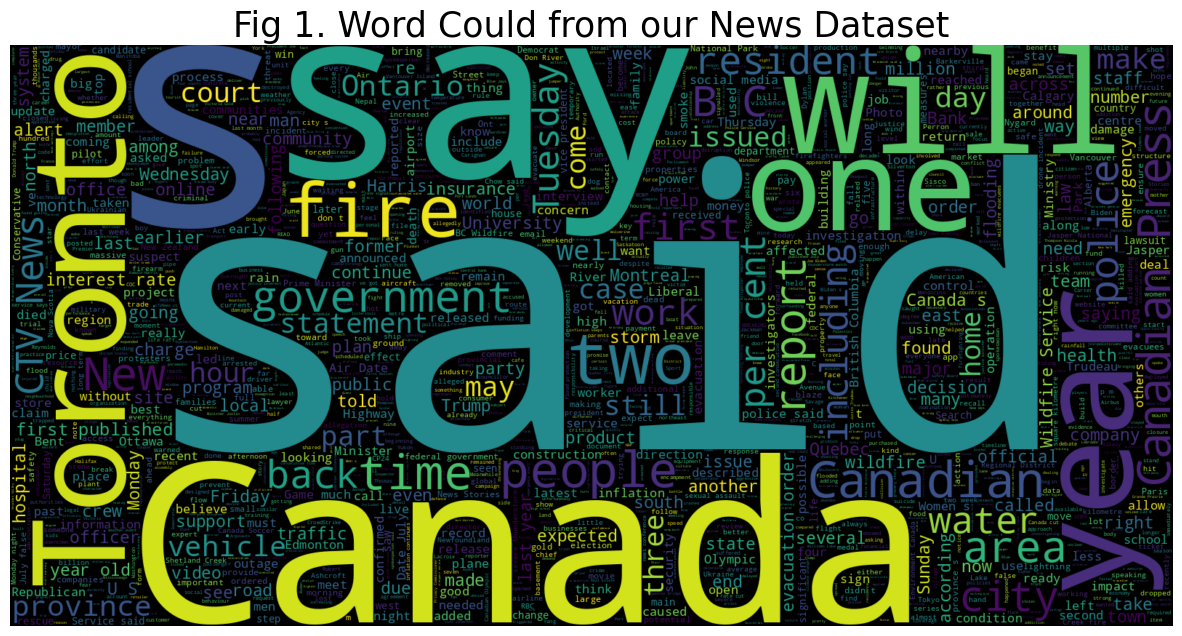

In [24]:
#Word cloud to grasp a wider idea about what the dataset is about


#define figure size
plt.figure(figsize=(15, 15))
#define a word cloud with max 2000 words and without stopwords (from same wordcloud)
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(sampleNewsDF['text']))
#show image
plt.imshow(wc, interpolation='bilinear')
#add title
plt.title("Fig 1. Word Could from our News Dataset", fontsize=25)
#hide axis
plt.axis('off')

plt.show()

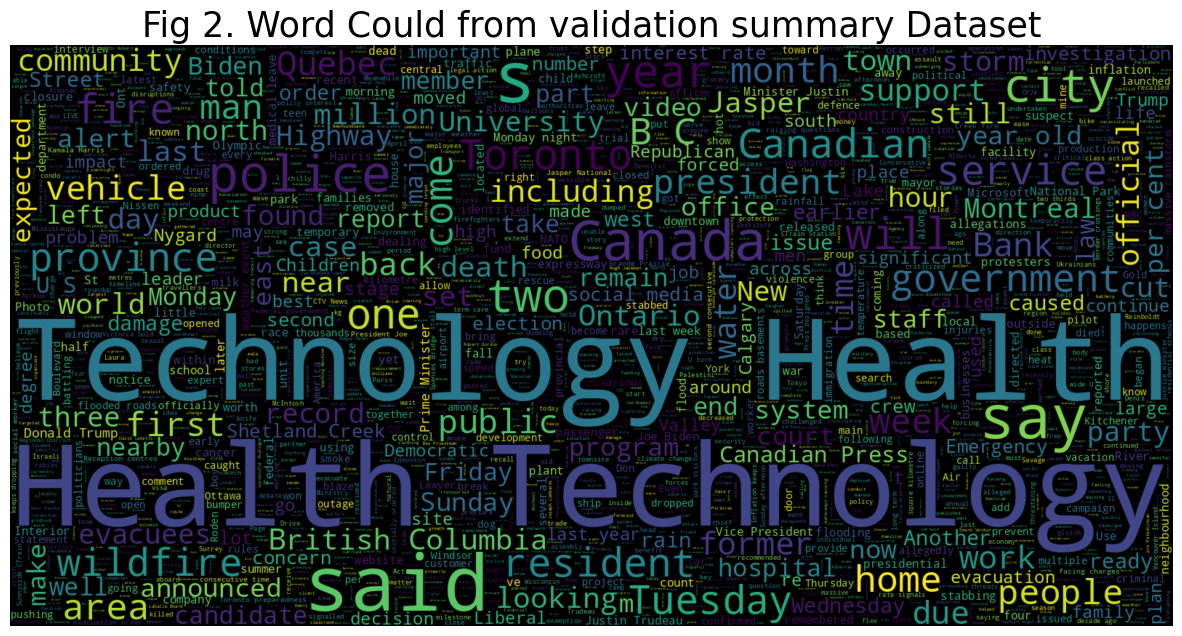

In [25]:
#Word cloud to grasp a wider idea about what the dataset is about


#define figure size
plt.figure(figsize=(15, 15))
#define a word cloud with max 2000 words and without stopwords (from same wordcloud)
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(sampleNewsDF['summary']))
#show image
plt.imshow(wc, interpolation='bilinear')
#add title
plt.title("Fig 2. Word Could from validation summary Dataset", fontsize=25)
#hide axis
plt.axis('off')

plt.show()

#### Distribution of letters per text

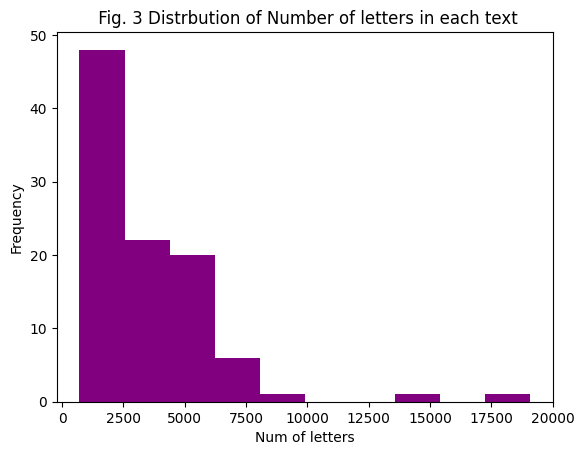

In [26]:
#Distribution of letters per text

#lenght of letter in each word
letters_len=sampleNewsDF['text'].str.len()
#show histogram with letters lenght and color
plt.hist(letters_len,color='purple')
#add title
plt.title(" Fig. 3 Distrbution of Number of letters in each text")
#add x and y label
plt.xlabel("Num of letters")
plt.ylabel("Frequency")
#show image
plt.show()


#### Distribution words per text

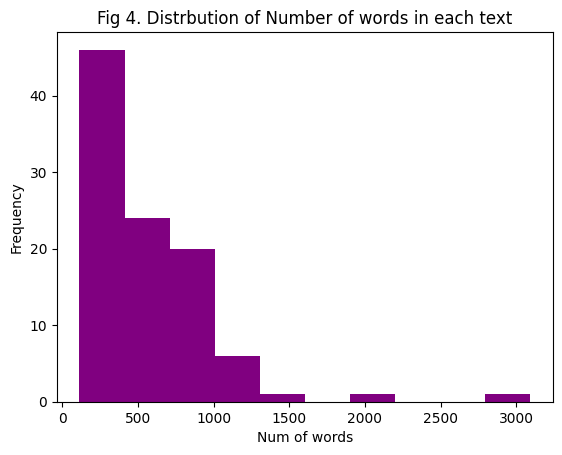

In [27]:
#get the lenght of each word in patterns
words_len=sampleNewsDF['text'].str.split().map(lambda x: len(x))
#show histogram
plt.hist(words_len,color='purple')
#add title
plt.title("Fig 4. Distrbution of Number of words in each text")
#add x , y label
plt.xlabel("Num of words")
plt.ylabel("Frequency")
#show image
plt.show()

#### Frequency distribution of words

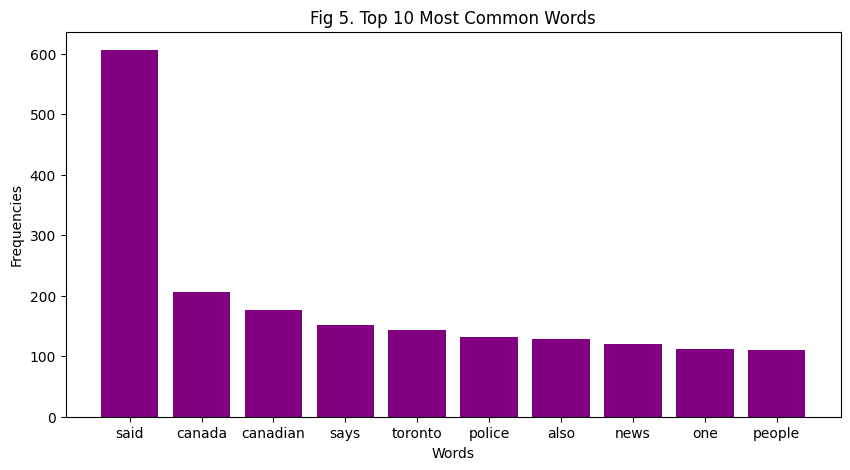

In [28]:
#get the top 10 most common words
#just for this the stop words will be eliminated
stop_words = set(stopwords.words('english'))

# Tokenize all text data and remove stop words
all_words = []
for text in sampleNewsDF['text']:
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    all_words.extend(filtered_tokens)


# Get the frequency distribution of the words
freq_dist = FreqDist(all_words)

# Get the top 10 most common words
top_10_words = freq_dist.most_common(10)

# Unzip the words and their frequencies for plotting
words, frequencies = zip(*top_10_words)

# Plot the top 10 words
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies, color='purple')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Fig 5. Top 10 Most Common Words')
plt.show()


#### Distribution the average word length


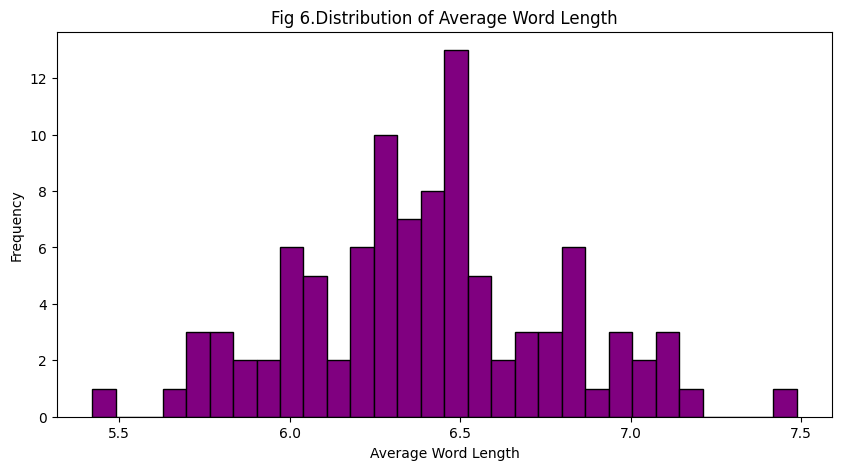

In [29]:

# Function to calculate average word length
def average_word_length(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    if filtered_tokens:
        avg_length = sum(len(word) for word in filtered_tokens) / len(filtered_tokens)
        return avg_length
    return 0

# Apply the function to each text entry in the DataFrame
sampleNewsDF['avg_word_length'] = sampleNewsDF['text'].apply(average_word_length)

# Plot the distribution of average word length
plt.figure(figsize=(10, 5))
plt.hist(sampleNewsDF['avg_word_length'], bins=30, color='purple', edgecolor='black')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.title('Fig 6.Distribution of Average Word Length')
plt.show()


#### Bigrams and Trigrams

In [30]:

# tokenize text and remove stop words
def tokenize_and_clean(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

# Collect all words from the text column
all_words = []
for text in sampleNewsDF['text']:
    filtered_tokens = tokenize_and_clean(text)
    all_words.extend(filtered_tokens)

# get top n-grams
def get_top_ngrams(words, n, top_n=10):
    n_grams = ngrams(words, n)
    n_grams_freq = Counter(n_grams)
    return n_grams_freq.most_common(top_n)


Top Bigrams:
canadian press: 89
ctv news: 63
per cent: 56
report canadian: 46
press first: 46
first published: 45
wildfire service: 29
interest rate: 28
bank canada: 27
police said: 23


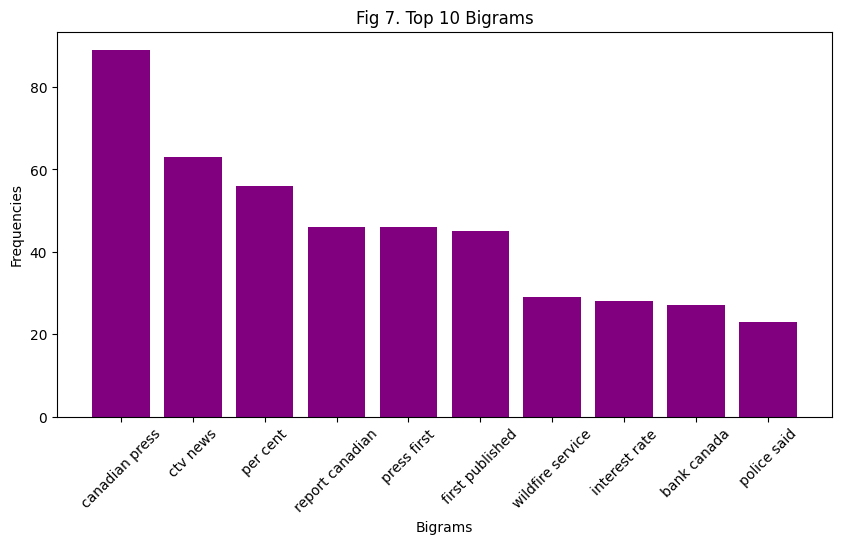

In [31]:

# Get top bigrams
top_bigrams = get_top_ngrams(all_words, 2)

# Display top bigrams
print("Top Bigrams:")
for gram, freq in top_bigrams:
    print(f"{' '.join(gram)}: {freq}")


# Plot the top bigrams
bigrams, bigram_freqs = zip(*top_bigrams)
bigram_labels = [' '.join(gram) for gram in bigrams]

plt.figure(figsize=(10, 5))
plt.bar(bigram_labels, bigram_freqs, color='purple')
plt.xlabel('Bigrams')
plt.ylabel('Frequencies')
plt.title('Fig 7. Top 10 Bigrams')
plt.xticks(rotation=45)
plt.show()



Top Trigrams:
canadian press first: 46
report canadian press: 45
press first published: 45
air date july: 19
first published canadian: 19
published canadian press: 19
bc wildfire service: 16
wildfire service said: 16
jasper national park: 14
ctv news toronto: 10


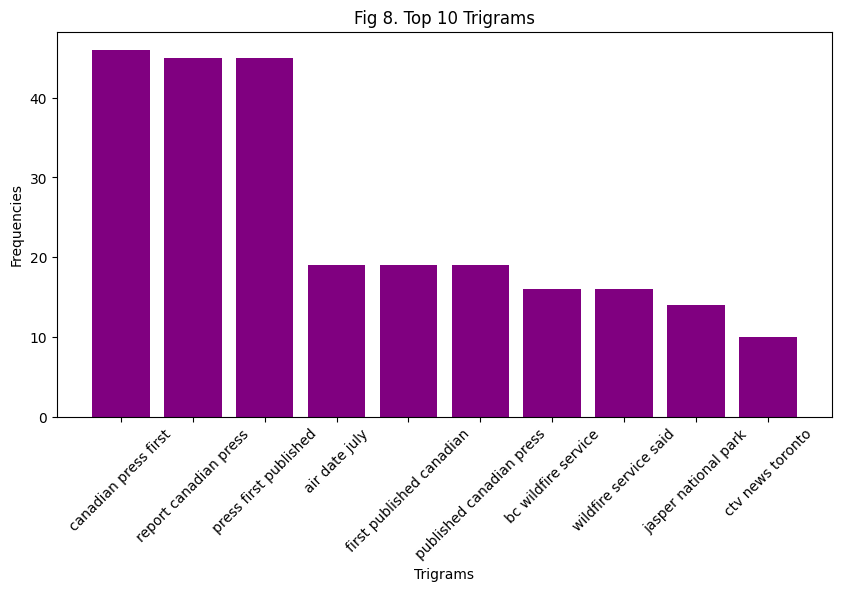

In [32]:
#get top  trigrams
top_trigrams = get_top_ngrams(all_words, 3)


# Display top trigrams
print("\nTop Trigrams:")
for gram, freq in top_trigrams:
    print(f"{' '.join(gram)}: {freq}")



# Plot the top trigrams
trigrams, trigram_freqs = zip(*top_trigrams)
trigram_labels = [' '.join(gram) for gram in trigrams]

plt.figure(figsize=(10, 5))
plt.bar(trigram_labels, trigram_freqs, color='purple')
plt.xlabel('Trigrams')
plt.ylabel('Frequencies')
plt.title('Fig 8. Top 10 Trigrams')
plt.xticks(rotation=45)
plt.show()

### 7. Train and Split

In [33]:
#apply train and split to our dataset
# Features and target
train = sampleNewsDF[:80]
test  = sampleNewsDF[80:]

print("train shape:", train.shape)
print("test shape:", test.shape)


train shape: (80, 12)
test shape: (19, 12)


### 8. Modeling

In [34]:
# Load the summarization model and tokenizer
model_name = "facebook/bart-large-cnn"
model = BartForConditionalGeneration.from_pretrained(model_name)
tokenizer = BartTokenizer.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [35]:
# Tokenize the inputs for train
inputs = [doc for doc in train["text"]]
tokenized_train = tokenizer(inputs, max_length=1024, truncation=True, padding='max_length', )

# Setup the tokenizer for targets
labels = tokenizer(train["summary"].tolist(), max_length=128, truncation=True, padding='max_length')

tokenized_train["labels"] = labels["input_ids"]


In [36]:
# Tokenize the inputs for test
inputs = [doc for doc in test["text"]]
tokenized_test = tokenizer(inputs, max_length=1024, truncation=True, padding='max_length')

# Setup the tokenizer for targets
labels = tokenizer(test["summary"].tolist(), max_length=128, truncation=True, padding='max_length')

tokenized_test["labels"] = labels["input_ids"]


In [37]:
tokenized_train.keys()

dict_keys(['input_ids', 'attention_mask', 'labels'])

In [41]:

# Load the ROUGE metric
rouge = load_metric('rouge')

def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    # Decode predictions and labels
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Compute ROUGE scores
    results = rouge.compute(predictions=decoded_preds, references=decoded_labels)

    # Process results
    result = {key: value.mid.fmeasure * 100 for key, value in results.items()}
    return {k: round(v, 4) for k, v in result.items()}


The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [42]:

class CustomDataset(Dataset):
    def __init__(self, tokenized_data):
        self.input_ids = tokenized_data['input_ids']
        self.attention_mask = tokenized_data.get('attention_mask', None)
        self.labels = tokenized_data.get('labels', None)

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        item = {
            'input_ids': torch.tensor(self.input_ids[idx], dtype=torch.long),
            'attention_mask': torch.tensor(self.attention_mask[idx], dtype=torch.long) if self.attention_mask is not None else None,
            'labels': torch.tensor(self.labels[idx], dtype=torch.long) if self.labels is not None else None
        }
        return item

In [43]:
# Create the dataset
train_dataset = CustomDataset(tokenized_train)
# Create the dataset
test_dataset = CustomDataset(tokenized_test)




In [44]:
# Instantiating Data Collator
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)


In [45]:

training_args = Seq2SeqTrainingArguments(
    output_dir = 'bart_summarizer',
    evaluation_strategy = "epoch",
    save_strategy = 'epoch',
    load_best_model_at_end = True,
    metric_for_best_model = 'eval_loss',
    seed = 42,
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=4,
    predict_with_generate=True,
    fp16=True,
    report_to="none"
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [46]:
# Defining Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

In [47]:

torch.cuda.empty_cache()

In [48]:
trainer.train() # Training model

/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:656: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,No log,2.492420,57.659600,48.419000,51.087800,51.298500
2,No log,1.203511,59.483700,51.782400,53.653900,54.072200
3,No log,0.791227,60.685900,52.513000,56.750300,56.813800
4,No log,0.692466,59.862200,52.031900,56.404300,56.383300


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_

TrainOutput(global_step=40, training_loss=1.6246273040771484, metrics={'train_runtime': 346.9458, 'train_samples_per_second': 0.922, 'train_steps_per_second': 0.115, 'total_flos': 693473472675840.0, 'train_loss': 1.6246273040771484, 'epoch': 4.0})

### 9. Metrics

In [49]:
#evaluation result
#create a dataset with results
evaluationResults=[trainer.evaluate(eval_dataset=df_processed) for df_processed in [train_dataset, test_dataset]]

eval_df = pd.DataFrame(evaluationResults, index=["train","test"]).iloc[:,:5]

       eval_loss  eval_rouge1  eval_rouge2  eval_rougeL  eval_rougeLsum
train   0.584497      67.9673      60.4782      62.2541         62.1210
test    0.692466      59.8622      52.0319      56.4043         56.3833


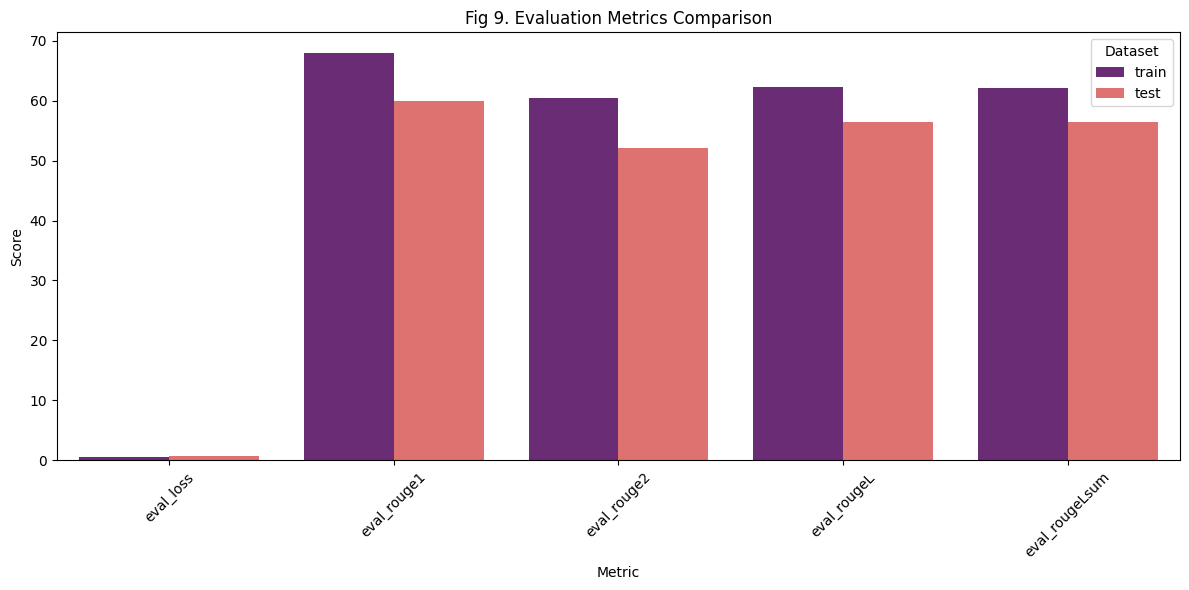

In [55]:

# Display the first few columns of the evaluation results for inspection
print(eval_df.iloc[:, :5])

# Plot the results
def plot_evaluation_results(df):
    plt.figure(figsize=(12, 6))
    melted_df = df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
    sns.barplot(data=melted_df, x='Metric', y='Score', hue='index', palette='magma')
    plt.title('Fig 9. Evaluation Metrics Comparison')
    plt.xticks(rotation=45)
    plt.ylabel('Score')
    plt.xlabel('Metric')
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_evaluation_results(eval_df)


### 10. Testing

In [56]:


print("Is CUDA available?", torch.cuda.is_available())
print("Number of GPUs available:", torch.cuda.device_count())


Is CUDA available? True
Number of GPUs available: 1


In [58]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Prepare the test data
text = '''A 22-year-old woman has been charged with first-degree murder after biological remains and chemicals were found inside a home in Toronto’s west end.
On June 27, Toronto police were called to a residence in the Weston Road and Black Creek Drive.

Once on scene, police said that officers located biological remains and chemicals in an apartment.

Related Stories
'Disturbing incident': Toronto police identify suspect who allegedly concealed dead body in Riverside apartment
Human remains located during search for missing Markham, Ont. woman
Dismembered human remains found on Toronto beach
Photos
homicide July 27 Weston Black Creek
A homicide investigation is underway after biological remains were found inside an apartment near Weston Road and Black Creek Drive on July 27.

Toronto Police Service’s (TPS) Chemical Biological Radiological and Nuclear team and Toronto Fire Service’s Hazmat team were called to the scene to safely remove the chemicals.

Testing by Ontario Forensic Pathology Services then confirmed that the biological remains are human resulting in homicide detectives taking carriage of the investigation.

Further testing determined that the remains are those of 40-year-old Selvin Paz Mejia, of Honduras.

On July 25, police arrested 22-year-old Mariana Hernandez and charged her with first-degree murder and improper/indecent interference with a dead body in connection
with the investigation. She was scheduled to appear at the Toronto Regional Bail Centre in North York that morning.'''

# Tokenize and convert to tensors
test_encodings = tokenizer(text, max_length=1024, truncation=True, padding='max_length', return_tensors='pt')
input_ids = test_encodings['input_ids'].to(device)
attention_mask = test_encodings['attention_mask'].to(device)

# Generate predictions
model.eval()
with torch.no_grad():
    outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask)
    preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)

# Print predictions
print(preds[0])

A 22-year-old woman has been charged with first-degree murder after biological remains and chemicals were found inside a home in Toronto’s west end on June 27. Mariana Hernandez, 22, was scheduled to appear at the Toronto Regional Bail Centre in North York that morning. The remains are believed to be those of Selvin Paz Mejia, 40, of Honduras.


### 11. Conclusion